# 大數據與商業分析
    內容分析：預測股價漲跌
    資料年分：2019 - 2021
    採用資料：上市股票，以及新聞報導語料

# 匯入股票漲跌資料集
- 共781778筆

In [2]:
import pandas as pd
import datetime
pd.options.mode.chained_assignment = None

df_stocks = pd.DataFrame()
files = [r'.\上市2021.csv', r'.\上市2020.csv', r'.\上市2019.csv']
for file in files:
    with open(file, newline='', encoding="utf-8") as csvfile:
        use_cols = [0, 1, 5]
        df = pd.read_csv(csvfile, usecols=use_cols,
                             names=['name', 'date', 'price'],
                             header=0,
                             parse_dates=['date'],
                             index_col='date')
    df_stocks = pd.concat([df_stocks, df], axis=0)    

# Sorted by 'date'
df_stocks = df_stocks.sort_values("date", ascending=True)

len(df_stocks)

781778

# 匯入新聞報導資料集
- 共587392筆

In [3]:
df_news = pd.DataFrame()
files = [r'.\news_2021.csv', r'.\news_2020.csv', r'.\news_2019.csv']
for file in files:
    with open(file, newline='', encoding="utf-8") as csvfile:
        use_cols = [4, 5, 7]
        df = pd.read_csv(csvfile, usecols=use_cols,
                             names=['date', 'title', 'text'],
                             header=0,
                             parse_dates=['date'],
                             index_col='date')
    df_news = pd.concat([df_news, df], axis=0)    

# Sorted by 'date'
df_news = df_news.sort_values("date", ascending=True)

# title 和 text 合併
df_news['content'] = df_news["title"] + " " + df_news["text"]

# 刪除原本欄位
df_news = df_news.drop(columns=['title', 'text'])

len(df_news)

587392

In [4]:
# 移除39篇空白報導
df_news.dropna(inplace=True)
df_news.isna().sum()

content    0
dtype: int64

In [5]:
# 只取年月日的時間格式
df_stocks.index = pd.to_datetime(df_stocks.index.date)
df_news.index = pd.to_datetime(df_news.index.date)

# 篩選出我們感興趣的股票的漲跌資料與報導
    選定「聯電」作為標的
    第D+1天與第D天相比，股價或指數漲跌超過幅度σ=1%，標記為漲或跌

2019 - 2021年為止，共有731個交易日

In [6]:
# 篩選股票漲跌資料
interest_stocks = '聯電'
df_IS = df_stocks[df_stocks['name'].str.contains(interest_stocks)]

# 篩選相關報導
df_IN = df_news[df_news['content'].str.contains(interest_stocks)]
print('共有{}篇{}相關報導'.format(len(df_IN), interest_stocks))

# 將price欄位轉成float，以便進行漲跌幅運算
df_IS['price'] = df_IS['price'].astype('float')

共有11075篇聯電相關報導


# 斷詞處理
    將結果匯出成df_2303.csv

In [7]:
import monpa
from monpa import utils
import re

+---------------------------------------------------------------------+
  Welcome to MONPA: Multi-Objective NER POS Annotator for Chinese
+---------------------------------------------------------------------+
已找到 model檔。Found model file.


In [8]:
# 這個function用來將字串以正則化處理去除中文字元以外的字元
def clearSentence(sentence):
    return re.sub(r'[^\u4e00-\u9fa5]+', '', sentence)

# 我們從stopwords_zh.txt這個檔案中匯入繁體中文的停用詞
with open('stopwords_zh.txt', 'r') as file:
    stopwords = file.read().splitlines() 
file.close()

In [9]:
# # 斷詞處理
# tokenStr_list = []
# for document in df_IN['content']:
#     sentence_list = utils.short_sentence(document)
#     tokenStr = str()
#     for sentence in sentence_list:
#         sentence = clearSentence(sentence)
#         tokens = monpa.cut(sentence)
#         tokens = filter(lambda x: len(x) < 6, tokens)
#         tokenStr += ' '.join(tokens)
#     tokenStr_list.append(tokenStr)

# pd.DataFrame(tokenStr_list).to_csv('df_2303.csv')

- 中研院CKIPTAGGER斷詞

In [10]:
# from ckiptagger import data_utils, construct_dictionary, WS, POS, NER

# # 使用 CPU：
# ws = WS("./data")
# pos = POS("./data")
# ner = NER("./data")

# word_to_weight = {
#     "買超": 2,
#     "賣超": 2,
#     "上漲": 2,
#     "下殺": 2,
#     "下跌": 2,
#     "跌破": 2,
#     '突破': 2,
#     '衝擊': 2,
#     '走弱': 2,
#     '受挫': 2,
#     '利多': 2,
#     '漲': 2,
#     '跌': 2,
#     '重挫': 3,
#     '大漲': 3,
#     '衝擊': 2
# }
# dictionary = construct_dictionary(word_to_weight)
# print(dictionary)

# word_sentence_list = ws(
#     sentence_list,
#     # sentence_segmentation = True, # To consider delimiters
#     # segment_delimiter_set = {",", "。", ":", "?", "!", ";"}), # This is the defualt set of delimiters
#     recommend_dictionary = dictionary, # words in this dictionary are encouraged
#     # coerce_dictionary = dictionary2, # words in this dictionary are forced
# )
# pd.DataFrame(word_sentence_list).to_csv('df_2303_ckip.csv')

In [9]:
# 先將df_IN的index存下來
IN_index = df_IN.index

- 讀入斷詞後的報導文章

- CKIP

In [12]:
# import pandas as pd
# tokenStr_list = []
# with open(r'.\df_2303_ckip.csv', newline='', encoding="utf-8") as csvfile:
#     df_IN = pd.read_csv(csvfile, header=0)

# df_IN.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
# nan_value = float("NaN")
# df_IN.replace(nan_value, '', inplace=True)
# df_IN = df_IN.applymap(str)
# df_IN = df_IN.applymap(clearSentence)
# df_IN = df_IN[df_IN.columns.values].apply(' '.join, axis=1)
# df_IN = pd.DataFrame(df_IN, columns=['content'])

- monpa

In [10]:
import pandas as pd
tokenStr_list = []
with open(r'.\df_2303.csv', newline='', encoding="utf-8") as csvfile:
    df_IN = pd.read_csv(csvfile, header=0, usecols=[1], names=['content'])

# 將報導與日期對應
df_IN.index = IN_index
df_IN

,content
2019-01-01,聯電日 上漲 美元 漲幅 折 台股 元中央社 台北 在 掛牌 以 美元 作收 上漲 美元 漲...
2019-01-02,熱門 族群 缺貨潮 延燒 族群 漲相佳 缺貨潮 發燒 至 年金氧 半 場效 電晶體 族群 漲...
2019-01-02,上市 外資 賣 超 排行 前名名次 股票 名稱 買賣 超 張數 收盤價 漲跌 元 大 台灣 ...
2019-01-02,台積電 等 家 收盤 報價 簡訊 收盤 漲跌 漲跌幅 換股 率 換算 價台 收盤 溢 折價 ...
2019-01-02,聯電 週一 收 美元 上漲 美元 或 折合 台幣 每 股 約 元 聯電 在 紐約交易所 掛牌...
...,...
2021-12-31,聯電 日 下跌 美元 跌幅 折 台股 元中央社 台北 在 掛牌 以 美元 作收 下跌 美元 ...
2021-12-31,半導體 產業 年 可望 再 創 新高美 中 緊張 關係 持續 中央社 記者 張建中 新竹 年...
2021-12-31,熱門 族群檔 飆股 出列 最 牛時報 台北 電年 台股 就 是 狂 上市 大漲 股票 市值 ...
2021-12-31,台北 股市 盤點 年度 飆股 黑馬 是 它 時報 台北 電 年 台股 以 萬八 之 姿 完美...


In [11]:
# 移除重複報導
print('移除重複報導:{}'.format(df_IN.duplicated().sum()))
df_IN = df_IN.drop_duplicates()

移除重複報導:1210


- 先計算D+1天的漲跌幅

In [12]:
n = 1

In [13]:
df_IS['return'] = df_IS['price'].pct_change(n)

# 紀錄n日後的真實漲跌
df_IS['updown'] = df_IS['return'].apply(lambda x: '漲' if x > 0 else '跌')

# 移除因日期移動而無法知道漲幅的日期
df_IS.dropna(inplace=True)
len(df_IS)
# 730

730

- 漲跌圖

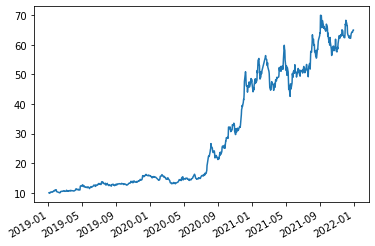

In [14]:
import matplotlib.pyplot as plt
df_IS['price'].plot()
plt.show()

In [15]:
# 觀察漲跌情況
df_IS['updown'].value_counts()

漲    366
跌    364
Name: updown, dtype: int64

- 我們標記股價漲跌幅度超過1%的天數，選定D-3天的報導作為看漲報導集/看跌報導集

In [16]:
up_sigma = 0.01
down_sigma = 0.01

In [17]:
import numpy as np
df_IS['label'] = df_IS['return'].apply(lambda x: '漲' if x >= up_sigma else ('跌' if x <= -down_sigma else np.nan))

# 取出看漲與看跌之日期
up_date = df_IS[df_IS['label']=='漲'].index - pd.Timedelta(days=n)
down_date = df_IS[df_IS['label']=='跌'].index - pd.Timedelta(days=n)

df_IS['label'].value_counts()

漲    232
跌    203
Name: label, dtype: int64

- 看漲報導資料集與看跌報導資料集

In [18]:
df_IN_up = df_IN[df_IN.index.isin(up_date)]
df_IN_down = df_IN[df_IN.index.isin(down_date)]

# 標註資料
df_IN_up['label'] = '漲'
df_IN_down['label'] = '跌'

print('看漲報導數：{}'.format(len(df_IN_up)))
print('看跌報導數：{}'.format(len(df_IN_down)))

# 臨界值
threshold_rate = len(df_IN_up)/len(df_IN_down)

看漲報導數：2344
看跌報導數：2304


In [19]:
df_IN_updown = pd.concat([df_IN_up, df_IN_down]).sort_index()
len(df_IN_updown)

4648

# Requirement(1)
    建構向量空間
    選出特徵詞


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

In [21]:
vectorizer = TfidfVectorizer(stop_words=stopwords)
tokens_vec = vectorizer.fit_transform(df_IN_updown['content'].values)
df_vec = pd.DataFrame(tokens_vec.toarray(),columns=vectorizer.get_feature_names())

C:\Users\Yicheng\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['lex'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [35]:
chnumber_list = ['一','二','三','四','五','六','七','八','九']
count = 0
for token in df_vec.columns.values:
    for ch_str in chnumber_list:
        if ch_str in token:
            count += 1
            df_vec.drop(token, axis=1, inplace=True)
            break
print(count)
df_vec.head()

2393


,丁景隆,丁腈,丈夫,上下檔,上下游,上下而,上不過,上世紀,上中石化,上交所,...,龍頭高通,龍鳳宮,龐大,龐德明,龐皮歐,龔培元,龔明鑫,龔明鑫日,龜山,龜田郡
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- 利用卡方值選出前500個特徵詞

In [37]:
y = df_IN_updown['label']
chi2_selector = SelectKBest(chi2, k = 500)
chi2_selector.fit(df_vec, y)
kbest_vocabs = df_vec.columns[chi2_selector.get_support()]
X = df_vec[kbest_vocabs]
X
#	一八年度	七葷	三安	三陽	上季	上市櫃	上海科	上漲點	上班	上述檔	...	鴻家軍	鴻海元大	鴻海國巨	鴻碩	鴿派	黃育仁	點分析師	點數	點日線	點重

,上海科,上漲點,上班,上限,下午,不過,中經院,中階,中電,事由,...,高薪,高通聯發科,高雄,高齡者,魏永祥,鴻碩,鴿派,黃育仁,點數,點重
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4643,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4644,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4645,0.0,0.0,0.0,0.0,0.0,0.035737,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4646,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Require(2)
    兩批文章作為訓練資料及測試資料，建立分類器

In [38]:
y = df_IN_updown['label'].apply(lambda x: 1 if x == '漲' else 0)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, classification_report

In [46]:
# 定義繪製ROC Curve的函數
import matplotlib.pyplot as plt
def plot_ROC_Curve(fpr, tpr):
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

In [43]:
from sklearn.model_selection import cross_val_score

def get_cvscore(classifier,X,y,cv=5,scoring='accuracy'):
    '''return scores, Avg score'''
    scores = cross_val_score(classifier,X,y,cv=cv,scoring=scoring)
    print(scores)
    print("Avg. Accuracy: {}".format(scores.mean()))

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def fit_model(classifier, X_train, y_train, y_test):
    '''We fit model and return fpr, tpr, y_pred'''
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_train)
    y_pred_prob = classifier.predict_proba(X_test)[:,1]
    print('Accuracy: {}'.format(classifier.score(X_test, y_test)))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    return fpr, tpr, y_pred

Accuracy of GradientBoostingClassifier: 0.624731182795699


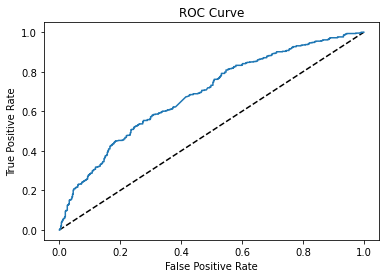

AUC: 0.6866999038034631
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       464
           1       0.63      0.61      0.62       466

    accuracy                           0.62       930
   macro avg       0.62      0.62      0.62       930
weighted avg       0.62      0.62      0.62       930

[[298 166]
 [183 283]]


In [47]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=7, random_state=123)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]
print('Accuracy of GradientBoostingClassifier: {}'.format(clf.score(X_test, y_test)))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot AUC Curve
plot_ROC_Curve(fpr, tpr)

# AUC
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# classification_report
print(classification_report(y_test, y_pred))

# confusion_matrix
from sklearn.metrics import confusion_matrix  
print(confusion_matrix(y_test, y_pred)) #印出混淆矩陣
# test/predicted 看跌   看漲
#    看跌         TN     FP
#    看漲         FN     TP

- Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

Accuracy of RandomForestClassifier: 0.6408602150537634


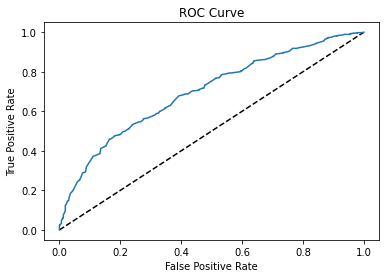

AUC: 0.6972237124463521
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       464
           1       0.63      0.67      0.65       466

    accuracy                           0.64       930
   macro avg       0.64      0.64      0.64       930
weighted avg       0.64      0.64      0.64       930

[[285 179]
 [155 311]]


In [37]:
forest = RandomForestClassifier(n_estimators = 150)
forest_fit = forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
y_pred_prob = forest.predict_proba(X_test)[:,1]
print('Accuracy of RandomForestClassifier: {}'.format(forest.score(X_test, y_test)))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot AUC Curve
plot_ROC_Curve(fpr, tpr)

# AUC
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# classification_report
print(classification_report(y_test, y_pred))

# confusion_matrix
from sklearn.metrics import confusion_matrix  
print(confusion_matrix(y_test, y_pred)) #印出混淆矩陣
# test/predicted 看跌   看漲
#    看跌         TN     FP
#    看漲         FN     TP

# 調整參數
    eta: 學習率
    max_depth: 每棵樹可以增長到的最大深度
    colsample_bytree: 簡單地指定在給定樹中的每個拆分處要選擇的特徵的比例 (越大越模型準確度越好，但可能overfit)

In [38]:
# import xgboost as xgb
# from xgboost.sklearn import XGBClassifier
# from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

- eta

In [39]:
# # Create the DMatrix from X and y: churn_dmatrix
# dmatrix = xgb.DMatrix(data=X, label=y)

# # Create the parameter dictionary for each tree (boosting round)
# params = {"objective":"reg:logistic", "max_depth":3}

# # Create list of eta values and empty list to store final round rmse per xgboost model
# eta_vals = [0.001, 0.01, 0.1]
# best_auc = []

# # Systematically vary the eta
# for curr_val in eta_vals:

#     params["eta"] = curr_val
    
#     # Perform cross-validation: cv_results
#     cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=3,
#                         num_boost_round=100, early_stopping_rounds=10,
#                         metrics="auc", as_pandas=True, seed=123)
    
#     # Append the final round rmse to best_rmse
#     best_auc.append(cv_results["test-auc-mean"].tail().values[-1])

# # Print the resultant DataFrame
# print(pd.DataFrame(list(zip(eta_vals, best_auc)), columns=["eta","best_auc"]))


- max_depth

In [40]:
# # Create your housing DMatrix: housing_dmatrix
# dmatrix = xgb.DMatrix(data=X, label=y)

# # Create the parameter dictionary
# params = {"objective":"reg:logistic"}

# # Create list of max_depth values
# max_depths = [2, 5, 10, 20]
# best_auc = []

# # Systematically vary the max_depth
# for curr_val in max_depths:

#     params["max_depth"] = curr_val
    
#     # Perform cross-validation
#     cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=2,
#                  num_boost_round=100, early_stopping_rounds=5,
#                  metrics="auc", as_pandas=True, seed=123)
    
#     # Append the final round rmse to best_rmse
#     best_auc.append(cv_results["test-auc-mean"].tail().values[-1])

# # Print the resultant DataFrame
# print(pd.DataFrame(list(zip(max_depths, best_auc)),columns=["max_depth","best_rmse"]))

- colsample_bytree

In [41]:
# # Create your housing DMatrix: housing_dmatrix
# dmatrix = xgb.DMatrix(data=X, label=y)

# # Create the parameter dictionary
# params = {"objective":"reg:logistic", "max_depth":20}

# # Create list of max_depth values
# colsample_bytree_vals = [0.1, 0.5, 0.8, 1]
# best_auc = []

# # Systematically vary the max_depth
# for curr_val in colsample_bytree_vals:

#     params["colsample_bytree"] = curr_val
    
#     # Perform cross-validation
#     cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=2,
#                  num_boost_round=100, early_stopping_rounds=5,
#                  metrics="auc", as_pandas=True, seed=123)
    
#     # Append the final round rmse to best_rmse
#     best_auc.append(cv_results["test-auc-mean"].tail().values[-1])

# # Print the resultant DataFrame
# print(pd.DataFrame(list(zip(colsample_bytree_vals, best_auc)),columns=["colsample_bytree","best_rmse"]))

In [42]:
# # Create the DMatrix from X and y: dmatrix
# dmatrix = xgb.DMatrix(data=X, label=y)

# # Create the parameter dictionary: params
# params = {"objective":"reg:logistic", "max_depth": 20, "colsample_bytree": 1.0, "eta": 1.0}

# # Perform cross_validation: cv_results
# cv_results = xgb.cv(dtrain=dmatrix, params=params,
#                   nfold=5, num_boost_round=100,
#                   metrics="error", as_pandas=True, seed=123)

# # Print cv_results
# print(cv_results)

# # Print the accuracy
# print(((1-cv_results["test-error-mean"]).iloc[-1]))

- Grid search

In [43]:
# import warnings
# warnings.filterwarnings('ignore')
# # Create the parameter grid: gbm_param_grid
# gbm_param_grid = {
#     'colsample_bytree': [0.3, 0.7, 1.0],
#     'n_estimators': [50, 100, 200],
#     'max_depth': [2, 5, 10, 20],
#     'eta': [0.001, 0.01, 0.1]
# }

# # Instantiate the regressor: gbm
# gbm = xgb.XGBClassifier()

# # Perform grid search: grid_mse
# grid_cv = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, cv=5, verbose=1)
# grid_cv.fit(X, y)

# # Print the best parameters and lowest RMSE
# print("Best parameters found: ", grid_cv.best_params_)
# print("Best score is:{} ".format(grid_cv.best_score_))

In [44]:
# import warnings
# warnings.filterwarnings('ignore')

# # Create the parameter grid: gbm_param_grid 
# gbm_param_grid = {
#     'colsample_bytree': [0.3, 0.7, 1.0],
#     'n_estimators': [50, 100, 200],
#     'max_depth': [2, 5, 10, 20],
#     'eta': [0.001, 0.01, 0.5, 0.1]
# }

# # Instantiate the regressor: gbm
# gbm = xgb.XGBClassifier()

# # Perform random search: grid_mse
# randomized_cv = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid, cv=5, verbose=1)
# randomized_cv.fit(X, y)

# # Print the best parameters and lowest RMSE
# print("Best parameters found: ",randomized_cv.best_params_)
# print("Best score is:{} ".format(randomized_cv.best_score_))

In [45]:
# # Print the best parameters and lowest RMSE
# print("Best parameters found: ",randomized_cv.best_params_)
# print("Best score is:{} ".format(randomized_cv.best_score_))

# Requirement(3): 回測

- 訓練資料

In [46]:
# import datetime
# train_startDate = datetime.date(2021,1,1)
# train_endDate = datetime.date(2021,3,31)
# df_IN_updown[train_startDate:train_endDate]

In [47]:
# vectorizer = TfidfVectorizer(stop_words=stopwords)
# X_train = vectorizer.fit_transform(df_IN_updown[train_startDate-pd.Timedelta(days=n):train_endDate-pd.Timedelta(days=n)]['content'])
# X_train = pd.DataFrame(X_train.toarray(),columns=vectorizer.get_feature_names())
# X_train

In [48]:
# y_train = df_IN_updown[train_startDate-pd.Timedelta(days=n):train_endDate-pd.Timedelta(days=n)]['label']
# chi2_selector = SelectKBest(chi2, k = 2000)
# chi2_selector.fit(X_train, y_train)
# kbest_vocabs = X_train.columns[chi2_selector.get_support()]
# X_train = X_train[kbest_vocabs]
# X_train

- 測試資料

In [49]:
# test_startDate = datetime.date(2021,4,1)
# test_endDate = datetime.date(2021,4,30)

In [50]:
# vectorizer = TfidfVectorizer(stop_words=stopwords)
# X_test = vectorizer.fit_transform(df_IN[test_startDate-pd.Timedelta(days=n):test_endDate-pd.Timedelta(days=n)]['content'])
# X_test = pd.DataFrame(X_test.toarray(),columns=vectorizer.get_feature_names())
# X_test = X_test.reindex(kbest_vocabs, axis=1, fill_value=0)
# X_test

# 建立預測模型

In [51]:
# clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=7, random_state=123)
# clf.fit(X_train, y_train)
# clf.score(X_train, y_train)

# 預測結果

In [52]:
# test_label = df_IS[test_startDate:test_endDate]['updown']
# test_data = df_IN[test_startDate-pd.Timedelta(days=n):test_endDate-pd.Timedelta(days=n)]
# test_data['predict_label'] = clf.predict(X_test)

# test_data.index.set_names('date', inplace= True)

# predict_label = test_data.groupby(['date', 'predict_label']).count().sort_values('content', ascending = False).sort_index(level=[0], sort_remaining=False).groupby(level=0).head(1).reset_index(level=1)['predict_label']

# # 將預測結果日期接回真實漲跌日期
# predict_label.index = predict_label.index + pd.Timedelta(days=n)

# # 預測狀況
# df_outcome = pd.DataFrame([test_label, predict_label]).T
# print('預測結果：')
# print(df_outcome)

# # 計算出手率
# number_of_businessdays = len(df_outcome)
# shot_rate = (number_of_businessdays - df_outcome['predict_label'].isna().sum()) / number_of_businessdays
# print('{}月份出手率:'.format(test_startDate.month), shot_rate)

# # 計算準確率
# n_true = (df_outcome['updown'] == df_outcome['predict_label']).sum()
# n_false = (df_outcome.dropna()['updown'] != df_outcome.dropna()['predict_label']).sum()
# accuracy = n_true / (n_true + n_false)

# from sklearn.metrics import accuracy_score
# print('{}月份預測準確率:'.format(test_startDate.month), accuracy)

# 對所有月份進行預測
    2019年4月 - 2021年12月

In [53]:
# 向量化
def build_vector_space(data):
    vectorizer = TfidfVectorizer(stop_words=stopwords)
    tokenized_data = vectorizer.fit_transform(data)
    tokenized_data = pd.DataFrame(tokenized_data.toarray(),columns=vectorizer.get_feature_names())
    return tokenized_data


# 特徵篩選
def feature_select(X_train, y_train, selector=chi2, n_feature=2000):
    chi2_selector = SelectKBest(selector, k = n_feature)
    chi2_selector.fit(X_train, y_train)
    kbest_vocabs = X_train.columns[chi2_selector.get_support()]
    return kbest_vocabs



In [ ]:
# 時間序列清單
train_startDate_list = pd.date_range(start='2019-1-1', end='2021-9-1', freq='MS')
train_endDate_list = pd.date_range(start='2019-3-1', end='2021-11-30', freq='M')
test_startDate_list = pd.date_range(start='2019-4-1', end='2021-12-1', freq='MS')
test_endDate_list = pd.date_range(start='2019-4-1', end='2021-12-31', freq='M')

In [85]:
# 時間序列清單
train_startDate_list = pd.date_range(start='2019-1-1', end='2020-12-1', freq='MS')
train_endDate_list = pd.date_range(start='2019-12-1', end='2021-11-30', freq='M')
test_startDate_list = pd.date_range(start='2020-1-1', end='2021-12-1', freq='MS')
test_endDate_list = pd.date_range(start='2020-1-1', end='2021-12-31', freq='M')

In [86]:
test_endDate_list

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [87]:
import warnings
warnings.filterwarnings('ignore')

- 舊方法
- 漲或跌的報導數較多就判定為漲/跌

In [56]:
df_result = pd.DataFrame()
total_spot = 0
total_bsday = 0
true_count = 0
false_count = 0
for train_startDate, train_endDate, test_startDate, test_endDate in zip(train_startDate_list, train_endDate_list, test_startDate_list, test_endDate_list):
    # 拆分資料集
    train_data = df_IN_updown[train_startDate-pd.Timedelta(days=n):train_endDate-pd.Timedelta(days=n)]
    test_data = df_IN_updown[test_startDate-pd.Timedelta(days=n):test_endDate-pd.Timedelta(days=n)]
    # 向量化
    X_train = build_vector_space(train_data['content'])
    y_train = train_data['label']
    # 特徵篩選
    kbest_vocabs = feature_select(X_train, y_train, selector=chi2, n_feature=500)
    X_train = X_train[kbest_vocabs]
    X_test = build_vector_space(test_data['content'])
    # 映射特徵向量到測試資料集
    X_test = X_test.reindex(kbest_vocabs, axis=1, fill_value=0)
    # 訓練模型
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=7, random_state=0)
    # clf = RandomForestClassifier(n_estimators=150,max_depth=7)
    clf.fit(X_train, y_train)
    clf.score(X_train, y_train)
    # 預測結果
    # test_label 為真實股價漲跌
    test_label = df_IS[test_startDate:test_endDate]['updown']
    test_data['predict_label'] = clf.predict(X_test)
    test_data.index.set_names('date', inplace= True)
    predict_label = test_data.groupby(['date', 'predict_label']).count().sort_values('content', ascending = False).sort_index(level=[0], sort_remaining=False).groupby(level=0).head(1).reset_index(level=1)['predict_label']
    # 將預測結果日期接回真實漲跌日期
    predict_label.index = predict_label.index + pd.Timedelta(days=n)
    # 預測狀況
    df_outcome = pd.DataFrame([test_label, predict_label]).T
    # 計算出手率
    number_of_businessdays = len(df_outcome)
    shot_rate = (number_of_businessdays - df_outcome['predict_label'].isna().sum()) / number_of_businessdays
    print('{}年{}月出手率:'.format(test_startDate.year, test_startDate.month), shot_rate)
    total_spot += number_of_businessdays - df_outcome['predict_label'].isna().sum()
    total_bsday += number_of_businessdays
    # 計算準確率
    n_true = (df_outcome['updown'] == df_outcome['predict_label']).sum()
    n_false = (df_outcome.dropna()['updown'] != df_outcome.dropna()['predict_label']).sum()
    accuracy = n_true / (n_true + n_false)
    print('{}年{}月預測準確率:'.format(test_startDate.year, test_startDate.month), accuracy)
    true_count += n_true
    false_count += n_false
    


    # 將統計結果彙整為一個DF
    result = {'shot_rate':[shot_rate], 'accuracy':[accuracy]}
    df_result = pd.concat([df_result, pd.DataFrame(data=result, index=[test_startDate])])


2019年5月出手率: 0.5909090909090909
2019年5月預測準確率: 0.38461538461538464
2019年6月出手率: 0.5789473684210527
2019年6月預測準確率: 0.7272727272727273
2019年7月出手率: 0.6086956521739131
2019年7月預測準確率: 0.5
2019年8月出手率: 0.38095238095238093
2019年8月預測準確率: 0.5
2019年9月出手率: 0.15789473684210525
2019年9月預測準確率: 0.3333333333333333
2019年10月出手率: 0.5238095238095238
2019年10月預測準確率: 0.5454545454545454
2019年11月出手率: 0.38095238095238093
2019年11月預測準確率: 0.25
2019年12月出手率: 0.4090909090909091
2019年12月預測準確率: 0.2222222222222222
2020年1月出手率: 0.4
2020年1月預測準確率: 0.6666666666666666
2020年2月出手率: 0.05263157894736842
2020年2月預測準確率: 1.0
2020年3月出手率: 0.2727272727272727
2020年3月預測準確率: 0.16666666666666666
2020年4月出手率: 0.5
2020年4月預測準確率: 0.3
2020年5月出手率: 0.25
2020年5月預測準確率: 1.0
2020年6月出手率: 0.65
2020年6月預測準確率: 0.38461538461538464
2020年7月出手率: 0.6086956521739131
2020年7月預測準確率: 0.35714285714285715
2020年8月出手率: 0.5714285714285714
2020年8月預測準確率: 0.5833333333333334
2020年9月出手率: 0.5454545454545454
2020年9月預測準確率: 0.6666666666666666
2020年10月出手率: 0.5789473684210527
2020年10月預測準確率

In [57]:
print('總出手次數:{}'.format(total_spot))
print('出手率:{}'.format(total_spot / total_bsday))
print('平均準確率:{}'.format(true_count / (true_count+false_count)))


總出手次數:347
出手率:0.528158295281583
平均準確率:0.4783861671469741


In [58]:
df_result

,shot_rate,accuracy
2019-05-01,0.590909,0.384615
2019-06-01,0.578947,0.727273
2019-07-01,0.608696,0.500000
2019-08-01,0.380952,0.500000
2019-09-01,0.157895,0.333333
2019-10-01,0.523810,0.545455
2019-11-01,0.380952,0.250000
2019-12-01,0.409091,0.222222
2020-01-01,0.400000,0.666667
2020-02-01,0.052632,1.000000


- 新方法

In [95]:
df_result = pd.DataFrame()
total_spot = 0
total_bsday = 0
true_count = 0
false_count = 0
up_predict_up = 0
up_predict_down = 0
down_predict_down = 0
down_predict_up = 0
for train_startDate, train_endDate, test_startDate, test_endDate in zip(train_startDate_list, train_endDate_list, test_startDate_list, test_endDate_list):
    # 拆分資料集
    train_data = df_IN_updown[train_startDate-pd.Timedelta(days=n):train_endDate-pd.Timedelta(days=n)]
    test_data = df_IN_updown[test_startDate-pd.Timedelta(days=n):test_endDate-pd.Timedelta(days=n)]
    test_data.drop('label', axis=1, inplace=True)
    # 向量化
    X_train = build_vector_space(train_data['content'])
    y_train = train_data['label']
    # 特徵篩選
    kbest_vocabs = feature_select(X_train, y_train, selector=chi2, n_feature=500)
    X_train = X_train[kbest_vocabs]
    try:
        X_test = build_vector_space(test_data['content'])
    except:
        continue
    # 映射特徵向量到測試資料集
    X_test = X_test.reindex(kbest_vocabs, axis=1, fill_value=0)
    # 訓練模型
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=7, random_state=0)
    # clf = RandomForestClassifier(n_estimators=150,max_depth=7)
    try:
        clf.fit(X_train, y_train)
    except:
        continue
    # 預測結果
    # test_label 為真實股價漲跌
    test_label = df_IS[test_startDate:test_endDate]['updown']
    test_data['predict_label'] = clf.predict(X_test)
    test_data.index.set_names('date', inplace= True)
    test_data = test_data.groupby(['date', 'predict_label']).count().sort_values('content', ascending = False).sort_index(level=[0], sort_remaining=False).unstack()
    test_data.columns = test_data.columns.droplevel()
    try:
        test_data['rate'] = test_data['漲'] / test_data['跌']
    except:
        if test_data.columns.values[0] == '漲':
            test_data['跌'] = 1
        else:
            test_data['漲'] = 1
        test_data['rate'] = test_data['漲'] / test_data['跌']
    test_data['predict_label'] = test_data['rate'].apply(lambda x: '漲' if x >= threshold_rate/0.67 else ('跌' if x <= (1/threshold_rate)*0.67 else np.nan))
    predict_label = test_data['predict_label']
    
    # test_data['predict_label'] = test_data.columns.values[0]

    # 將預測結果日期接回真實漲跌日期
    predict_label.index = predict_label.index + pd.Timedelta(days=n)
    # 預測狀況
    df_outcome = pd.DataFrame([test_label, predict_label]).T
    # 計算出手率
    number_of_businessdays = len(df_outcome)
    shot_rate = (number_of_businessdays - df_outcome['predict_label'].isna().sum()) / number_of_businessdays
    print('{}年{}月出手率:'.format(test_startDate.year, test_startDate.month), shot_rate)
    total_spot += number_of_businessdays - df_outcome['predict_label'].isna().sum()
    total_bsday += number_of_businessdays
    # 計算準確率
    n_true = (df_outcome['updown'] == df_outcome['predict_label']).sum()
    n_false = (df_outcome.dropna()['updown'] != df_outcome.dropna()['predict_label']).sum()
    accuracy = n_true / (n_true + n_false)
    print('{}年{}月預測準確率:'.format(test_startDate.year, test_startDate.month), accuracy)
    true_count += n_true
    false_count += n_false
    
    up_predict_up += ((df_outcome['updown'] == '漲') & (df_outcome['updown'] == df_outcome['predict_label'])).sum()
    up_predict_down += ((df_outcome['updown'] == '漲') & (df_outcome.dropna()['updown'] != df_outcome.dropna()['predict_label'])).sum()
    down_predict_down += ((df_outcome['updown'] == '跌') & (df_outcome['updown'] == df_outcome['predict_label'])).sum()
    down_predict_up += ((df_outcome['updown'] == '跌') & (df_outcome.dropna()['updown'] != df_outcome.dropna()['predict_label'])).sum()
    
    
    # 將統計結果彙整為一個DF
    result = {'shot_rate':[shot_rate], 'accuracy':[accuracy]}
    df_result = pd.concat([df_result, pd.DataFrame(data=result, index=[test_startDate])])

2020年1月出手率: 0.26666666666666666
2020年1月預測準確率: 0.5
2020年2月出手率: 0.0
2020年2月預測準確率: nan
2020年3月出手率: 0.22727272727272727
2020年3月預測準確率: 0.0
2020年4月出手率: 0.25
2020年4月預測準確率: 0.2
2020年5月出手率: 0.05
2020年5月預測準確率: 0.0
2020年6月出手率: 0.3
2020年6月預測準確率: 0.16666666666666666
2020年7月出手率: 0.30434782608695654
2020年7月預測準確率: 0.2857142857142857
2020年8月出手率: 0.14285714285714285
2020年8月預測準確率: 0.6666666666666666
2020年9月出手率: 0.22727272727272727
2020年9月預測準確率: 0.6
2020年10月出手率: 0.3157894736842105
2020年10月預測準確率: 0.5
2020年11月出手率: 0.23809523809523808
2020年11月預測準確率: 0.8
2020年12月出手率: 0.5217391304347826
2020年12月預測準確率: 0.5
2021年1月出手率: 0.3
2021年1月預測準確率: 0.5
2021年2月出手率: 0.3076923076923077
2021年2月預測準確率: 0.75
2021年3月出手率: 0.4090909090909091
2021年3月預測準確率: 0.2222222222222222
2021年4月出手率: 0.2631578947368421
2021年4月預測準確率: 0.8
2021年5月出手率: 0.2857142857142857
2021年5月預測準確率: 0.16666666666666666
2021年6月出手率: 0.23809523809523808
2021年6月預測準確率: 0.4
2021年7月出手率: 0.22727272727272727
2021年7月預測準確率: 0.2
2021年8月出手率: 0.22727272727272727
2021年8月預測準確率: 0.2


In [96]:
print('真實為漲且預測漲:{}'.format(up_predict_up))
print('真實為漲但預測跌:{}'.format(up_predict_down))
print('真實為跌但預測漲:{}'.format(down_predict_up))
print('真實為跌且預測跌:{}'.format(down_predict_down))

真實為漲且預測漲:29
真實為漲但預測跌:35
真實為跌但預測漲:38
真實為跌且預測跌:21


In [97]:
print('總出手次數:{}'.format(total_spot))
print('出手率:{}'.format(total_spot / total_bsday))
print('平均準確率:{}'.format(true_count / (true_count+false_count)))


總出手次數:123
出手率:0.25153374233128833
平均準確率:0.4065040650406504


In [ ]:
df_result

,shot_rate,accuracy
2019-04-01,0.150000,1.000000
2019-05-01,0.318182,0.571429
2019-06-01,0.210526,1.000000
2019-07-01,0.130435,0.333333
2019-08-01,0.095238,0.500000
2019-09-01,0.052632,0.000000
2019-10-01,0.190476,0.750000
2019-11-01,0.095238,0.000000
2019-12-01,0.272727,0.333333
2020-01-01,0.133333,0.500000


# 討論
    1.確定標的
    2.更好的特徵選擇?
    3.模型算法
    4.出手的投票方式
    

# 出手投票方式：
    1.漲跌分數域值
    2.原資料集比例當域值
# 特徵：
    MI

# 資料集：
    News

# 準確率：0.6up
# 出手率：0.25up

